Nama : Mega Dwi Rengganis <br>
Nim : 211351081 <br>
Kelas : Teknik Informatika Pagi A

# Import Dataset Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"megaegol05","key":"c2fddbc88b47f679dbcc10204696d4a0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d uciml/german-credit

  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 25.1MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/german-credit.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn.cluster as KMeans
from sklearn.cluster import KMeans

# Data Discovery

In [7]:
df = pd.read_csv('/content/german_credit_data.csv')

In [8]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [10]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

# Exploratory Data Analysist (EDA)

In [11]:
def scatters(df, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=df, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=df, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=df, ax=ax3)
    plt.tight_layout()

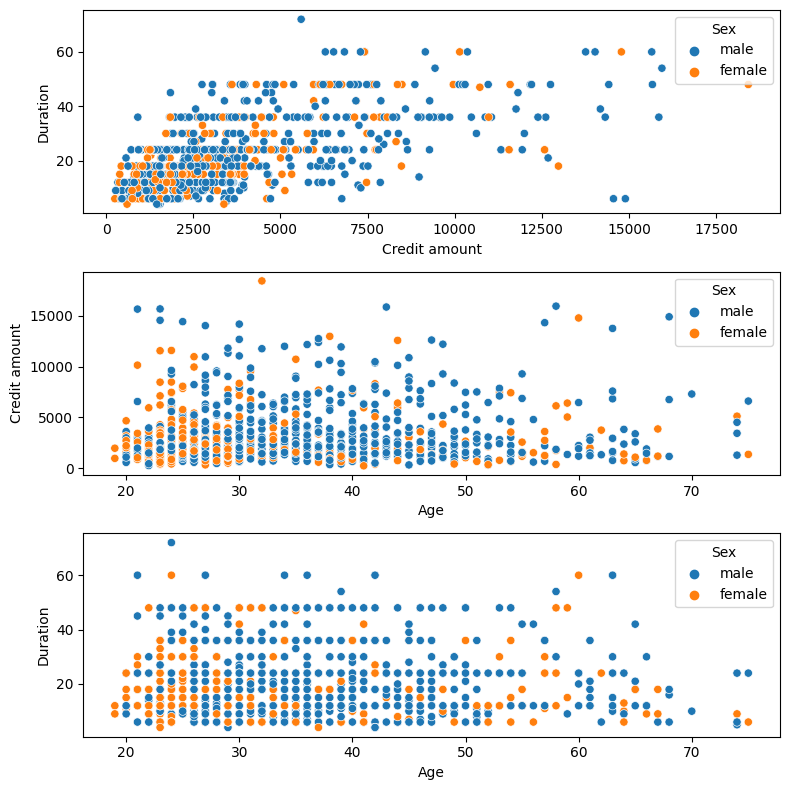

In [12]:
scatters(df, h="Sex")

Grafik diatas menunjukkan perilaku nasabah berdasarkan credit, umur, durasi peminjaman, dan jenis kelamin

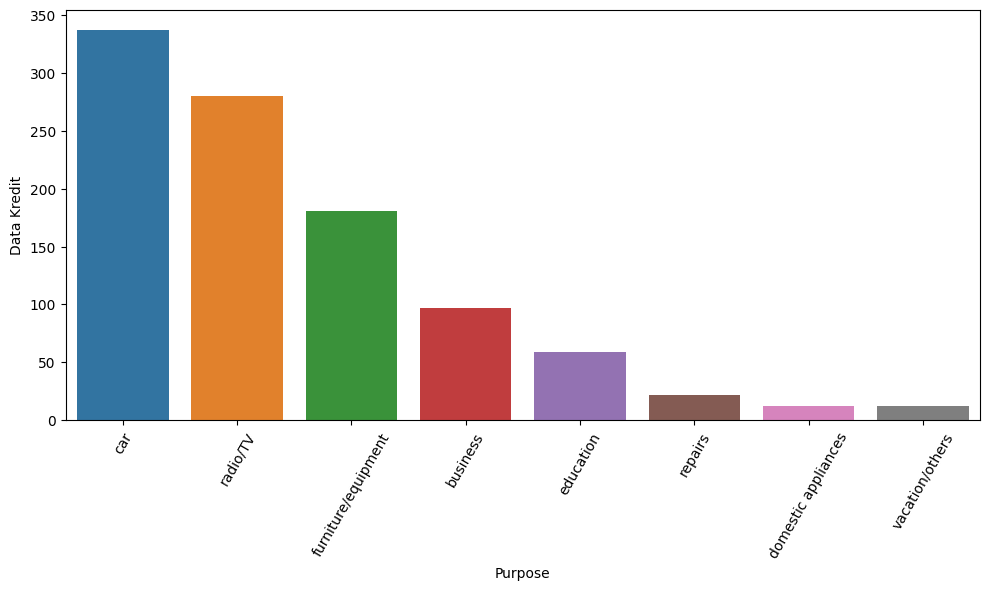

In [13]:
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Data Kredit")
plt.tight_layout()

Grafik diatas menunjukkan bahwa alasan cicilan mobil adalah data kredit yang paling banyak dimiliki nasabah

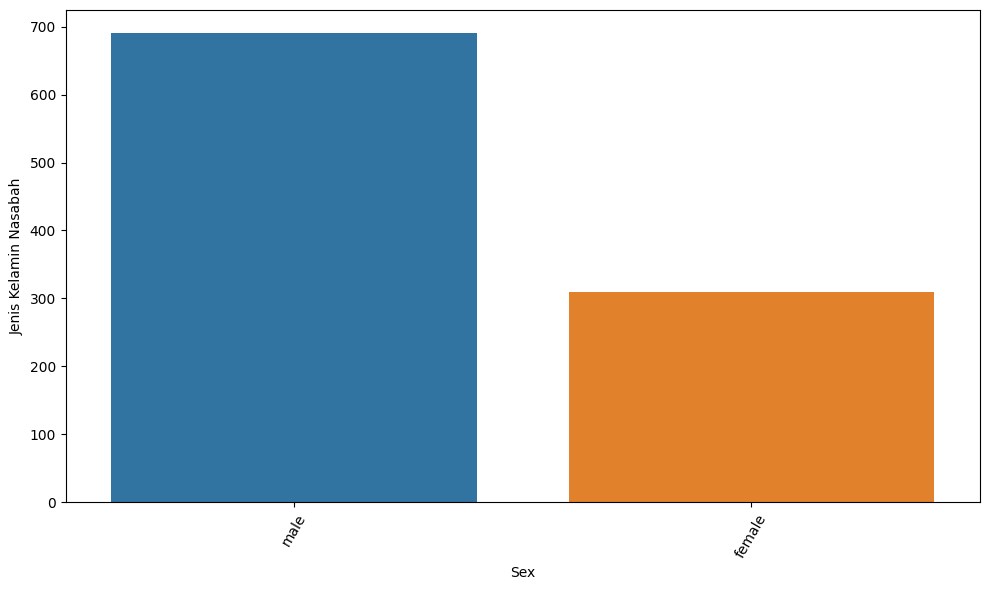

In [14]:
n_credits = df.groupby("Sex")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Sex",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Jenis Kelamin Nasabah")
plt.tight_layout()

Data grafik diatas menunjukkan bahwa pada data ini, jumlah nasabah laki-laki paling dominan, hal ini disebabkan biasanya nasabah laki-laki berperan sebagai kepala rumah tangga dan pekerja didalam keluarga

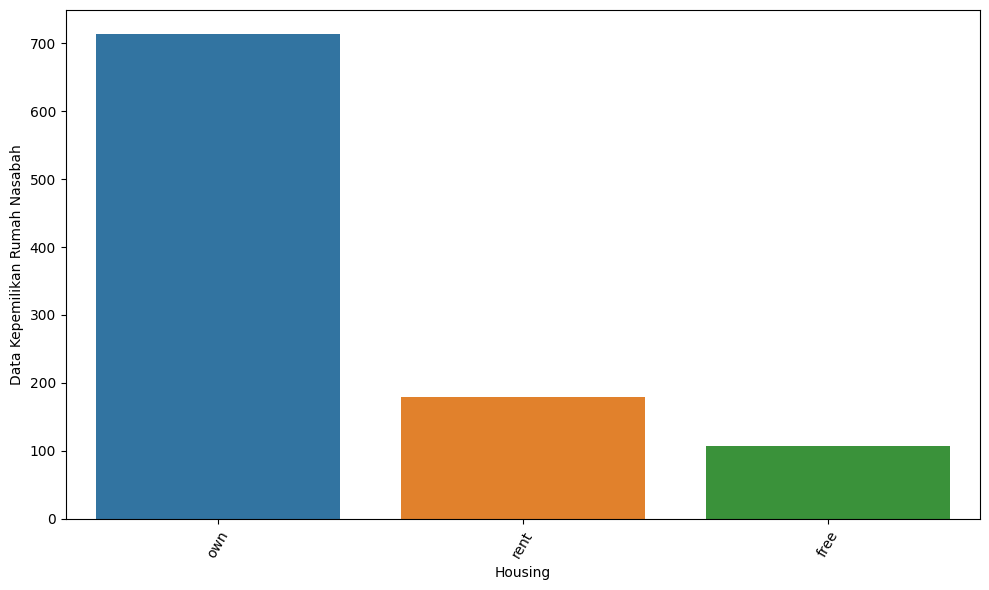

In [15]:
n_credits = df.groupby("Housing")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Housing",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Data Kepemilikan Rumah Nasabah")
plt.tight_layout()

Data diatas menunjukkan bahwa pada dataset ini, jumlah pemilik rumah adalah yang paling banyak, dibandingkan nasabah yang tidak memiliki rumah dan mengontrak

# Data Preparation

In [16]:
df["Saving accounts"].fillna(method="bfill",inplace=True)

In [17]:
df["Checking account"].fillna(method="bfill",inplace=True)

In [18]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [19]:
df.drop(columns='Unnamed: 0',axis="columns",inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [20]:
y = [x for x in df['Housing'] if x.isnumeric() == False]
print(y)

['own', 'own', 'own', 'free', 'free', 'free', 'own', 'rent', 'own', 'own', 'rent', 'rent', 'own', 'own', 'rent', 'own', 'own', 'own', 'free', 'own', 'own', 'rent', 'rent', 'own', 'own', 'own', 'own', 'rent', 'own', 'own', 'own', 'own', 'own', 'rent', 'own', 'own', 'free', 'own', 'own', 'own', 'own', 'own', 'own', 'rent', 'free', 'own', 'own', 'rent', 'own', 'own', 'own', 'own', 'own', 'own', 'free', 'own', 'own', 'own', 'own', 'rent', 'own', 'own', 'free', 'own', 'own', 'own', 'own', 'own', 'free', 'own', 'own', 'rent', 'free', 'own', 'own', 'free', 'own', 'own', 'own', 'own', 'own', 'own', 'rent', 'own', 'own', 'own', 'own', 'free', 'own', 'own', 'own', 'own', 'own', 'rent', 'own', 'rent', 'own', 'own', 'own', 'rent', 'rent', 'rent', 'own', 'rent', 'rent', 'own', 'own', 'own', 'own', 'own', 'own', 'rent', 'rent', 'own', 'own', 'own', 'own', 'rent', 'own', 'own', 'own', 'rent', 'rent', 'free', 'rent', 'own', 'own', 'own', 'own', 'own', 'own', 'own', 'own', 'free', 'own', 'own', 'own', 

In [21]:
df['Housing'] = df['Housing'].str.replace('free','0')
df['Housing'] = df['Housing'].str.replace('own','1')
df['Housing'] = df['Housing'].str.replace('rent','2')

In [22]:
df['Housing'] = pd.to_numeric(df['Housing'])

In [23]:
y = [x for x in df['Saving accounts'] if x.isnumeric() == False]
print(y)

['little', 'little', 'little', 'little', 'little', 'quite rich', 'quite rich', 'little', 'rich', 'little', 'little', 'little', 'little', 'little', 'little', 'moderate', 'little', 'little', 'little', 'quite rich', 'little', 'quite rich', 'little', 'moderate', 'little', 'little', 'little', 'rich', 'little', 'little', 'rich', 'little', 'moderate', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'quite rich', 'quite rich', 'little', 'moderate', 'little', 'little', 'quite rich', 'quite rich', 'little', 'moderate', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'rich', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'quite rich', 'quite rich', 'moderate', 'little', 'little', 'little', 'little', 'moderate', 'moderate', 'little', 'little', 'little', 'rich', 'rich', 'rich', 'little

In [24]:
df['Saving accounts'] = df['Saving accounts'].str.replace('little','0')
df['Saving accounts'] = df['Saving accounts'].str.replace('moderate','1')
df['Saving accounts'] = df['Saving accounts'].str.replace('quite rich','2')
df['Saving accounts'] = df['Saving accounts'].str.replace('rich','3')

In [25]:
df['Saving accounts'] = pd.to_numeric(df['Saving accounts'])

In [26]:
y = [x for x in df['Checking account'] if x.isnumeric() == False]
print(y)

['little', 'moderate', 'little', 'little', 'little', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'little', 'moderate', 'little', 'little', 'little', 'little', 'little', 'moderate', 'little', 'little', 'little', 'little', 'moderate', 'little', 'little', 'rich', 'rich', 'moderate', 'little', 'moderate', 'little', 'moderate', 'rich', 'rich', 'moderate', 'rich', 'rich', 'rich', 'moderate', 'moderate', 'moderate', 'moderate', 'little', 'little', 'little', 'little', 'little', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'rich', 'rich', 'little', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'little', 'little', 'little', 'little', 'little', 'moderate', 'little', 'little', 'little', 'moderate', 'moderate', 'moderate', 'little', 'little', 'little', 'little', 'little', 'moderate', 'moderate', 'moderate', 'little', 'little', 'little', 'little', 'rich', 'rich

In [27]:
df['Checking account'] = df['Checking account'].str.replace('little','0')
df['Checking account'] = df['Checking account'].str.replace('moderate','1')
df['Checking account'] = df['Checking account'].str.replace('quite rich','2')
df['Checking account'] = df['Checking account'].str.replace('rich','3')

In [28]:
df['Checking account'] = pd.to_numeric(df['Checking account'])

In [29]:
y = [x for x in df['Purpose'] if x.isnumeric() == False]
print(y)

['radio/TV', 'radio/TV', 'education', 'furniture/equipment', 'car', 'education', 'furniture/equipment', 'car', 'radio/TV', 'car', 'car', 'business', 'radio/TV', 'car', 'car', 'radio/TV', 'radio/TV', 'business', 'car', 'radio/TV', 'car', 'radio/TV', 'car', 'car', 'furniture/equipment', 'furniture/equipment', 'radio/TV', 'radio/TV', 'radio/TV', 'business', 'business', 'furniture/equipment', 'car', 'business', 'furniture/equipment', 'radio/TV', 'education', 'radio/TV', 'domestic appliances', 'radio/TV', 'radio/TV', 'radio/TV', 'repairs', 'car', 'car', 'car', 'radio/TV', 'car', 'car', 'radio/TV', 'furniture/equipment', 'car', 'radio/TV', 'car', 'car', 'car', 'radio/TV', 'radio/TV', 'car', 'furniture/equipment', 'business', 'radio/TV', 'business', 'business', 'radio/TV', 'repairs', 'radio/TV', 'car', 'education', 'radio/TV', 'car', 'radio/TV', 'vacation/others', 'business', 'education', 'car', 'radio/TV', 'radio/TV', 'car', 'furniture/equipment', 'radio/TV', 'radio/TV', 'business', 'vacatio

In [30]:
df['Purpose'] = df['Purpose'].str.replace('radio/TV','0')
df['Purpose'] = df['Purpose'].str.replace('education','1')
df['Purpose'] = df['Purpose'].str.replace('furniture/equipment','2')
df['Purpose'] = df['Purpose'].str.replace('car','3')
df['Purpose'] = df['Purpose'].str.replace('business','4')
df['Purpose'] = df['Purpose'].str.replace('domestic appliances','5')
df['Purpose'] = df['Purpose'].str.replace('repairs','6')
df['Purpose'] = df['Purpose'].str.replace('vacation/others','7')

In [31]:
df['Purpose'] = pd.to_numeric(df['Purpose'])

In [32]:
y = [x for x in df['Sex'] if x.isnumeric() == False]
print(y)

['male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female

In [33]:
df['Sex'] = df['Sex'].str.replace('male','1')
df['Sex'] = df['Sex'].str.replace('female','0')
df['Sex'] = df['Sex'].str.replace('fe1','2')

In [34]:
df['Sex'] = pd.to_numeric(df['Sex'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [36]:
x = df.drop(['Sex'], axis=1)

# Modelling

Text(0.5, 0, 'inertia')

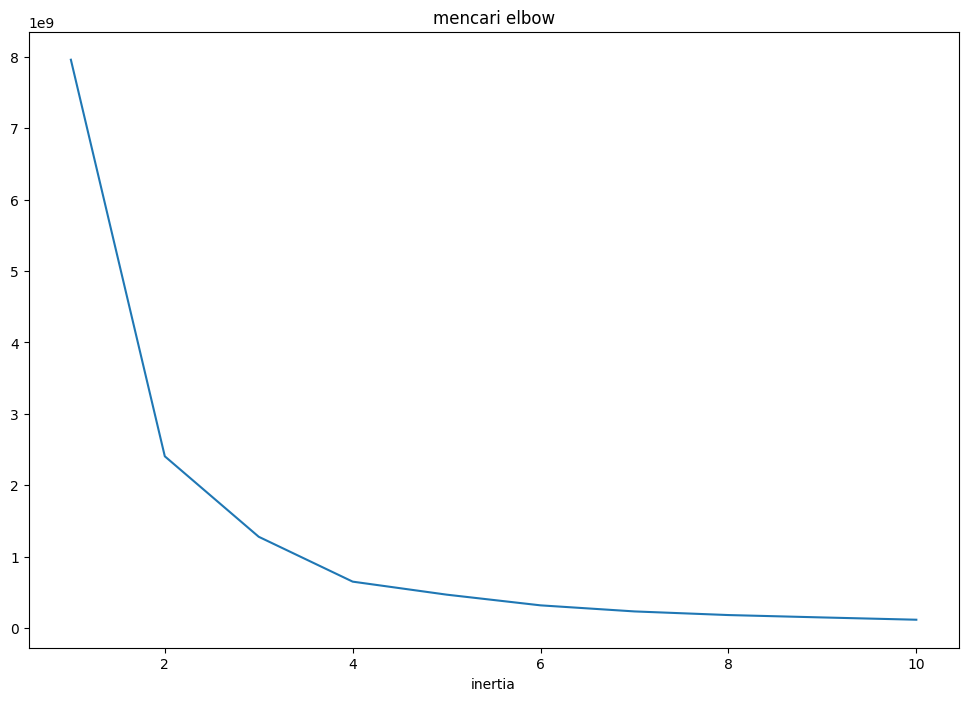

In [37]:
import warnings
warnings.filterwarnings("ignore")
clusters=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i).fit(x)
  clusters.append(kmeans.inertia_)

fig,ax=plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_xlabel('inertia')

Berdasarkan elbow point, kita akan mengambil jumlah k atau cluster sebanyak 2

In [38]:
print(x)

     Age  Job  Housing  Saving accounts  Checking account  Credit amount  \
0     67    2        1                0                 0           1169   
1     22    2        1                0                 1           5951   
2     49    1        1                0                 0           2096   
3     45    2        0                0                 0           7882   
4     53    2        0                0                 0           4870   
..   ...  ...      ...              ...               ...            ...   
995   31    1        1                0                 0           1736   
996   40    3        1                0                 0           3857   
997   38    2        1                0                 0            804   
998   23    2        0                0                 0           1845   
999   27    2        1                1                 1           4576   

     Duration  Purpose  
0           6        0  
1          48        0  
2          1

In [39]:
n_clust = 2
kmean = KMeans(n_clusters=n_clust).fit(x)
x['Labels'] = kmean.labels_

# Visualisasi Hasil Modelling

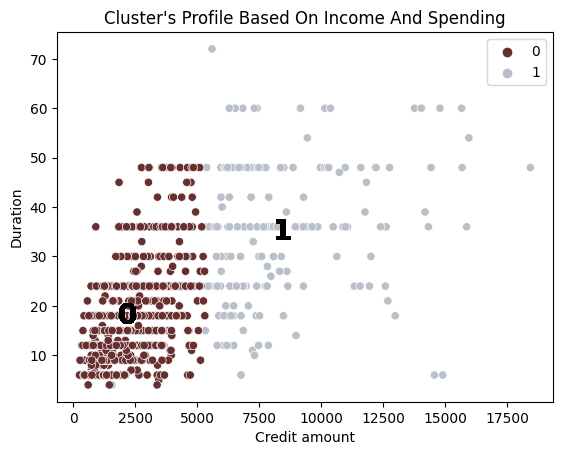

In [40]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

pl = sns.scatterplot(x=x["Credit amount"], y=x["Duration"],hue=x["Labels"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
for label in x['Labels']:
  pl.annotate(label,
               (x[x['Labels']==label]['Credit amount'].mean(),
                x[x['Labels']==label]['Duration'].mean()),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                size = 20, weight='bold',
                color='black')
plt.legend()
plt.show()

Gambar diatas yaitu visualisasi clustering pelanggan berdasarkan credit dan durasi

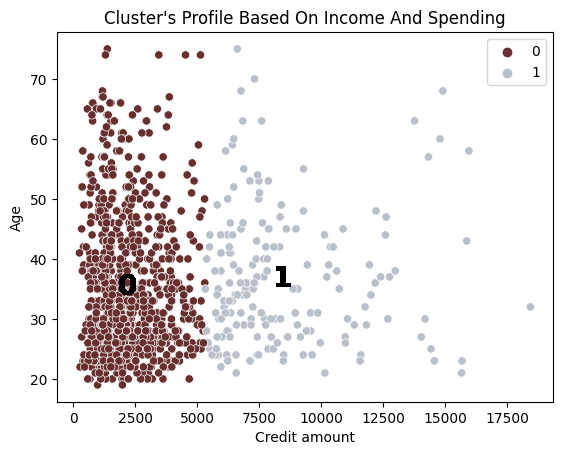

In [41]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

pl = sns.scatterplot(x=x["Credit amount"], y=x["Age"],hue=x["Labels"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
for label in x['Labels']:
  pl.annotate(label,
               (x[x['Labels']==label]['Credit amount'].mean(),
                x[x['Labels']==label]['Age'].mean()),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                size = 20, weight='bold',
                color='black')
plt.legend()
plt.show()

Gambar diatas yaitu visualisasi clustering pelanggan berdasarkan credit dan umur

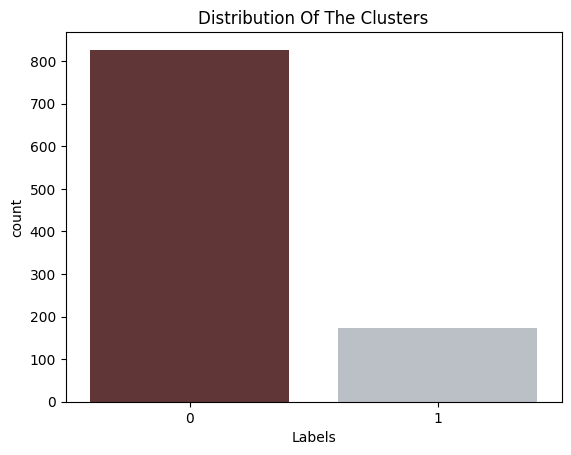

In [42]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=x["Labels"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

pada data diatas, jumlah nasabah yang termasuk golongan 0 memiliki jumlah paling banyak

In [43]:
x_test = df.drop(['Sex'], axis=1)

In [44]:
grouped_af = x.groupby(['Labels']).mean().round(1)
grouped_af

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Labels,,,,,,,,
0,35.3,1.8,1.1,0.5,0.8,2193.3,18.0,2.0
1,36.8,2.2,0.9,0.4,0.7,8424.2,34.9,2.7


Data diatas adalah data hasil clustering

# Evaluasi Menggunakan Silhouette Score

In [45]:
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x_test)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(x_test, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.722242491850519
For n_clusters=3, the silhouette score is 0.650238097043906
For n_clusters=4, the silhouette score is 0.6116661500899592
For n_clusters=5, the silhouette score is 0.5831031017326815
For n_clusters=6, the silhouette score is 0.5778281196679591
For n_clusters=7, the silhouette score is 0.577706049649353
For n_clusters=8, the silhouette score is 0.5724130408752136


Hasil silhouette score menunjukkan bahwa jumlah cluster 2 memiliki score paling baik yaitu 0,722

# Simpan Model

In [46]:
x.to_excel("output_cluster.xlsx")